# Python Fundamentals - Exercise 4.9 (Part 2)

## 1. Import Libraries and New Dataframe from Part 1

In [2]:
#Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
#Create path
path = r'/Users/puneet/Desktop/Instacart Basket Analysis 08-2025'

In [8]:
#Import pkl file from part 1
df_merged = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','ords_prods_cust_merge_E49.pkl'))

## -

## 2. Create bar, histogram, scatterplot, and line charts from Exercise instructions using subset data
#### *Already done, attached in other 4.9 Exercise file*

## 3. Create Histogram on "order hour of the day" column

In [9]:
#Check merged data first
df_merged.head()

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,customer_frequency,first_name,last_name,gender,state,age,date_joined,number_of_dependants,family_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [11]:
#Show merged data coloumn info
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 33 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 int64   
 2   order_number            int64   
 3   orders_day_of_the_week  int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  float64 
 6   product_id              int64   
 7   add_to_cart_order       int64   
 8   reordered               int64   
 9   product_name            object  
 10  aisle_id                int64   
 11  department_id           int64   
 12  prices                  float64 
 13  _merge                  category
 14  price_range_loc         object  
 15  busiest_day             object  
 16  busiest_days            object  
 17  busiest_period_of_day   object  
 18  max_order               int64   
 19  loyalty_flag            object  
 20  spending_flag           float64 
 21  spende

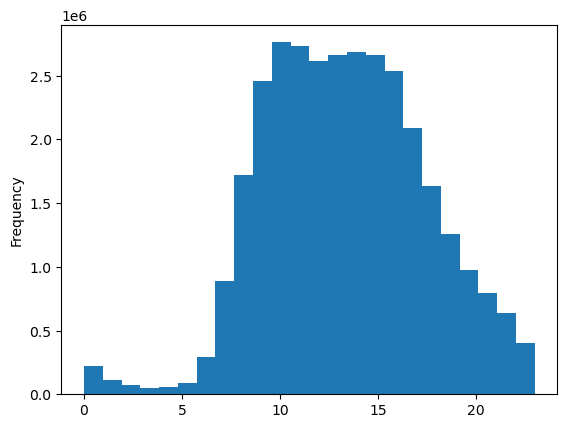

In [10]:
#Create histogram on hour of day column
hist = df_merged['order_hour_of_day'].plot.hist(bins = 24)

- The histogram shows that most of the orders are placed between the hours of 8AM and 5PM
- The "peak" number of orders happen 9AM and Noon

## -

## 4. Create a bar chart for the loyalty flag

In [12]:
#Check loyalty flag first
df_merged['loyalty_flag'].value_counts(dropna = False)

loyalty_flag
Regular customer    15876776
Loyal customer      10284093
New customer         6243990
Name: count, dtype: int64

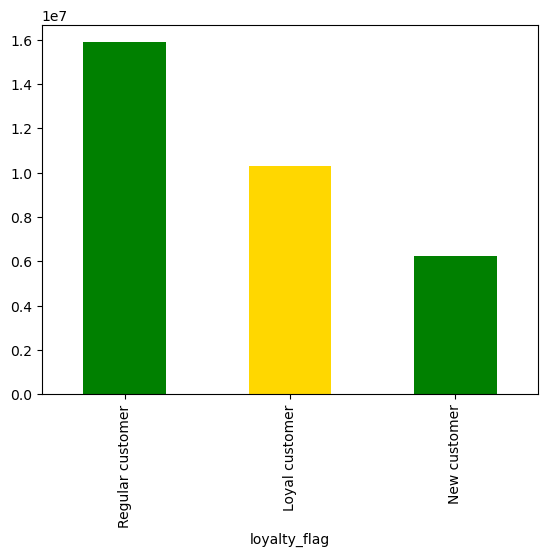

In [23]:
#Loyalty flag bar chart
bar = df_merged['loyalty_flag'].value_counts().plot.bar(color = ['green','gold','green'])

## -

## 5. Check difference in expenditure dependant on the hour of the day

Create random samples first for line chart

In [24]:
np.random.seed(4)

In [25]:
dev = np.random.rand(len(df_merged)) <= 0.7

In [26]:
len(df_merged)

32404859

In [27]:
#Create "Big" sample
big = df_merged[dev]

In [28]:
#Create "small" sample
small = df_merged[~dev]

In [31]:
#Check length of small and big samples
len(big) + len(small)

32404859

In [34]:
#Create subset with just 2 appropriate columns from "small" sample
df_2 = small[['order_hour_of_day','prices']]

In [35]:
#Check subset data with small sample
df_2

,order_hour_of_day,prices
0,8,9.0
2,8,4.4
3,8,4.7
6,7,3.0
10,7,4.0
...,...,...
32404841,12,3.8
32404842,12,5.9
32404843,12,3.7
32404849,12,3.2


Create line graph with new subset

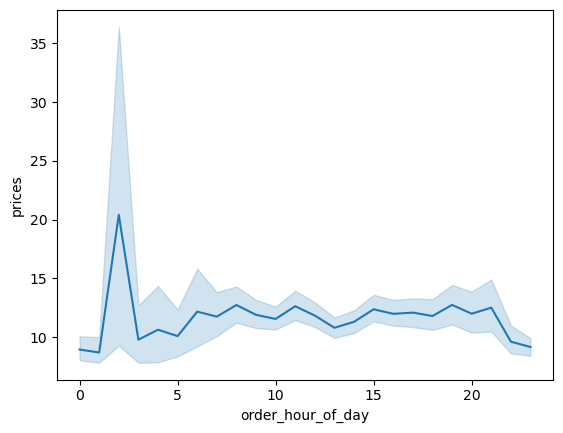

In [37]:
#Create line chart
line = sns.lineplot(data = df_2, x = 'order_hour_of_day',y = 'prices')

- We can see that the most spending comes in the late hours of the night, between Midnight and 3AM, this could be due to reoccuring/automatic/bulk payments starting at the beginning of the new day
- Otherwise, this would be erratic buying behaviors from consumers because most orders are placed from 8AM to 5PM (histogram above)

## -

## 6. Connections between age and family situation

In [39]:
#Create subset dataframe with relevant columns
df_3 = small[['age','number_of_dependants']]

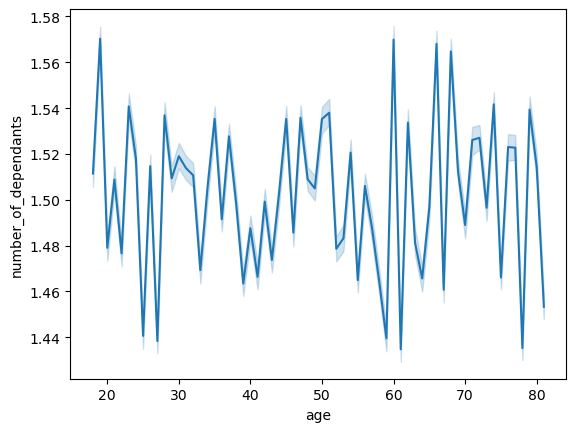

In [41]:
#Create new line chart with age and number of dependants to see correlation
line_2 = sns.lineplot(data = df_3, x = 'age', y = 'number_of_dependants')

- There doesn't seem to be any correlation between age and number of dependants
- The line fluctuates through all ages, meaning no correlation for an insight

## -

## 7. Connections between age and spending power (income) using a scatterplot

In [42]:
#Create subset with age and income columns
df_4 = small[['age','income']]

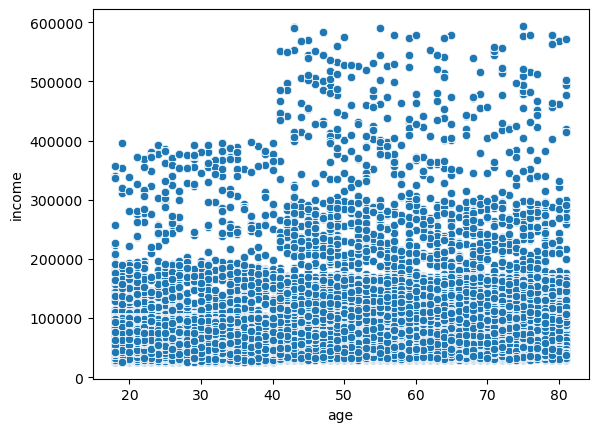

In [43]:
#Create scatterplot
scatter = sns.scatterplot(data = df_4, x = 'age', y = 'income')

- We see see from the scatterplot that there is a notable increase in income after the age of 40 (instacart should target the older audience)
- 40+ year olds have a stronger income in the 200K-300K range, and even some over the 400K income range
- Those under the age of 40 have significantly less spending power, as not a single plot point shows anyone making over ~400K income

## -

## 8. Export the visualizations as ".png" files

In [44]:
#Export order hour of day histogram
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'order_hours_histogram.png'))

In [45]:
#Export loyalty flag bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_flag_bar_chart.png'))

In [46]:
#Export order hour of day and prices line graph
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','order_hour_prices_line_graph.png'))

In [47]:
#Export age and number of dependants line graph
line_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_dependants_line_graph.png'))

In [48]:
#Export age and income scatterplot
scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations','age_income_scatterplot.png'))